In [1]:
import numpy as np
import pandas as pd

# import linear_model and datasets from sklearn
from sklearn import linear_model

# import GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Task 1: Download your data and load them into the Python.
You can find them [**here**](https://drive.google.com/file/d/0Bz9_0VdXvv9bX0MzUEhVdmpCc3c/view?usp=sharing).

- Features and response variables are in different files
- be careful about number of spaces between the values in the file

In [95]:
X = pd.read_csv('Smartphone Sensor Data/Smartphone Sensor Data/train/X_train.txt',delimiter= '\s+', index_col=False, header = None)
X.shape

(7352, 561)

In [96]:
y = pd.read_csv('Smartphone Sensor Data/Smartphone Sensor Data/train/y_train.txt',delimiter= '\s+', index_col=False, header = None)

## Task 2: Create Binary target variable: categories 1,2,3 --> 1, categories 4,5,6 --> 0 
This will represent binary variable indicating if person is walking or not

In [97]:
y_binary = np.zeros(len(y))
X54 = np.zeros(len(y))
for i in range(len(y)):
    if y.loc[i,0]<4:
        y_binary[i] = 1
    X54[i] = X.loc[i,54]

In [64]:
y_binary = y_binary.reshape(-1,1)
X54 = X54.reshape(-1,1)

## Task 3

+ Create Univariate Binary Logistic Regression with feature number 54, which represents `tGravityAcc-min()-Y`: gravity acceleration signals in direction of Y
+ Compare the results of Logistic regressions from different Python packages (sklearn, statsmodel)
+ Plot the FIT of predicted probabilities to the original values

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X54,y_binary,test_size=0.25,random_state=0,stratify=y_binary)

C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Text(0.5, 257.44, 'Predicted label')

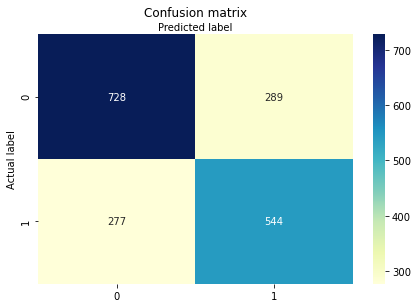

In [66]:
# sklearn
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

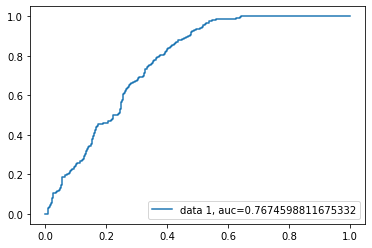

In [67]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label='data 1, auc='+str(auc))
plt.legend(loc=4)
plt.show()

In [68]:
import statsmodels.api as sm

X54_sm = sm.add_constant(X54)
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X54_sm,y_binary,test_size=0.25,random_state=0,stratify=y_binary)


logit = sm.Logit(y_train_sm, X_train_sm)

# fit the model
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.545522
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 5514
Model:                          Logit   Df Residuals:                     5512
Method:                           MLE   Df Model:                            1
Date:                Tue, 18 Aug 2020   Pseudo R-squ.:                  0.2065
Time:                        17:14:47   Log-Likelihood:                -3008.0
converged:                       True   LL-Null:                       -3790.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0534      0.031     -1.713      0.087      -0.115       0.008
x1            -4.2383      0.

In [87]:
y_pred_sm = result.predict(X_test_sm)

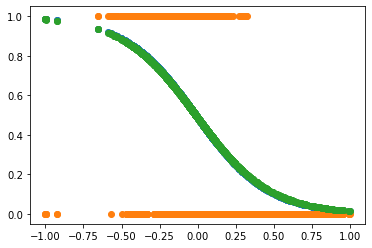

In [92]:
plt.scatter(X_test_sm[:,1],y_pred_sm)
plt.scatter(X_test,y_test)
plt.scatter(X_test,logreg.predict_proba(X_test)[:,1])

In [89]:
test = np.zeros(len(y_pred_sm))
for i in range(len(y_pred_sm)):
    if y_pred_sm[i]>0.5:
        test[i]=1

## Task 4
- Try to fit Binary Logistic Regression with all the features? How many are significant?

In [163]:
X_all = sm.add_constant(X)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all,y_binary,test_size=0.25,random_state=0,stratify=y_binary)


logit = sm.GLM(y_train_all, X_train_all)

# fit the model
result = logit.fit()

In [164]:
to_keep = pd.DataFrame(result.pvalues<0.005)
to_keep = to_keep.index[to_keep[0] == True][1:-1].tolist()
X_keep = X_all.iloc[:,to_keep]

In [165]:
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X_keep,y_binary,test_size=0.25,random_state=0,stratify=y_binary)

logit = sm.GLM(y_train_k, X_train_k)

# fit the model
result = logit.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 5514
Model:                            GLM   Df Residuals:                     5423
Model Family:                Gaussian   Df Model:                           90
Link Function:               identity   Scale:                       0.0031129
Method:                          IRLS   Log-Likelihood:                 8135.8
Date:                Tue, 18 Aug 2020   Deviance:                       16.881
Time:                        21:47:47   Pearson chi2:                     16.9
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
2             -0.0603      0.015     -4.084      0.0

In [167]:
to_keep = pd.DataFrame(result.pvalues<0.005)
to_keep = to_keep.index[to_keep[0] == True][1:-1].tolist()
X_keep = X_keep.loc[:,to_keep]

In [168]:
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X_keep,y_binary,test_size=0.25,random_state=0,stratify=y_binary)


logit = sm.GLM(y_train_k, X_train_k)

# fit the model
result = logit.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 5514
Model:                            GLM   Df Residuals:                     5466
Model Family:                Gaussian   Df Model:                           47
Link Function:               identity   Scale:                       0.0031704
Method:                          IRLS   Log-Likelihood:                 8063.6
Date:                Tue, 18 Aug 2020   Deviance:                       17.329
Time:                        21:48:21   Pearson chi2:                     17.3
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
3              0.4627      0.022     21.099      0.0

In [169]:
to_keep = pd.DataFrame(result.pvalues<0.005)
to_keep = to_keep.index[to_keep[0] == True][1:-1].tolist()
X_keep = X_keep.loc[:,to_keep]

In [170]:
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X_keep,y_binary,test_size=0.25,random_state=0,stratify=y_binary)


logit = sm.GLM(y_train_k, X_train_k)

# fit the model
result = logit.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 5514
Model:                            GLM   Df Residuals:                     5472
Model Family:                Gaussian   Df Model:                           41
Link Function:               identity   Scale:                       0.0034719
Method:                          IRLS   Log-Likelihood:                 7810.1
Date:                Tue, 18 Aug 2020   Deviance:                       18.998
Time:                        21:48:48   Pearson chi2:                     19.0
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
13            -0.0612      0.010     -6.391      0.0

## Task 5
Now, let's fit Multinomial Logistic regression to predict all categories. Firstly, we can start with **Univariate** model for these features number separately:
+ 4
+ 54
- 19

Check the contingency matrix to see the effect of particular features!! (each feature can be good in predicting different categories)

In [195]:
X4 = np.zeros(len(y))
X54 = np.zeros(len(y))
X19 = np.zeros(len(y))
for i in range(len(y)):
    X4[i] = X.loc[i,4]
    X54[i] = X.loc[i,54]
    X19[i] = X.loc[i,19]
X4 = X4.reshape(-1,1)
X54 = X54.reshape(-1,1)
X19 = X19.reshape(-1,1)
y_arr = y[0].values.tolist()
#y_arr = y_arr.reshape(-1,1)

In [196]:
X4_sm = sm.add_constant(X4)
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X4_sm,y_arr,test_size=0.25,random_state=0,stratify=y_arr)

MNlogit = sm.MNLogit(y_train_sm, X_train_sm)

# fit the model
result = MNlogit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 1.132289
         Iterations 10
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                 5514
Model:                        MNLogit   Df Residuals:                     5504
Method:                           MLE   Df Model:                            5
Date:                Tue, 18 Aug 2020   Pseudo R-squ.:                  0.3653
Time:                        22:10:43   Log-Likelihood:                -6243.4
converged:                       True   LL-Null:                       -9836.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
       y=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1295      0.048     -2.678      0.007      -0.224      -0.035
x1             0.4143      0

In [197]:
X54_sm = sm.add_constant(X54)
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X54_sm,y_arr,test_size=0.25,random_state=0,stratify=y_arr)

MNlogit = sm.MNLogit(y_train_sm, X_train_sm)

# fit the model
result = MNlogit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 1.451655
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                 5514
Model:                        MNLogit   Df Residuals:                     5504
Method:                           MLE   Df Model:                            5
Date:                Tue, 18 Aug 2020   Pseudo R-squ.:                  0.1862
Time:                        22:11:13   Log-Likelihood:                -8004.4
converged:                       True   LL-Null:                       -9836.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
       y=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4000      0.058     -6.948      0.000      -0.513      -0.287
x1            -2.1907      0.

In [198]:
X19_sm = sm.add_constant(X19)
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X19_sm,y_arr,test_size=0.25,random_state=0,stratify=y_arr)

MNlogit = sm.MNLogit(y_train_sm, X_train_sm)

# fit the model
result = MNlogit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 1.010678
         Iterations 12
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                 5514
Model:                        MNLogit   Df Residuals:                     5504
Method:                           MLE   Df Model:                            5
Date:                Tue, 18 Aug 2020   Pseudo R-squ.:                  0.4334
Time:                        22:11:33   Log-Likelihood:                -5572.9
converged:                       True   LL-Null:                       -9836.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
       y=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2795      0.132      2.123      0.034       0.021       0.538
x1             1.0026      0

## Task 6

Fit the Multinomial Logistic Regression model again. Now, try to choose **all** important features we have in the dataset. Who will get the best predictions with the smallest number of features?

In [274]:
Xarr = np.zeros(X.shape)
y_arr= np.zeros(len(y))
for i in range(len(y)):
    Xarr[i,:] = X.loc[i,:]
    y_arr[i] = y.loc[i]
#y_arr = y_arr.reshape(-1,1)

In [385]:
X_train, X_test, y_train, y_test = train_test_split(Xarr,y_arr,test_size=0.25,random_state=0,stratify=y_arr)
logreg = LogisticRegression(multi_class = 'ovr',max_iter=1500)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [386]:
importance = np.zeros((6,Xarr.shape[1]))
for i in range(6):
    for j in range(Xarr.shape[1]):
        importance[i,j] = logreg.coef_[i,j]
importance.shape

(6, 464)

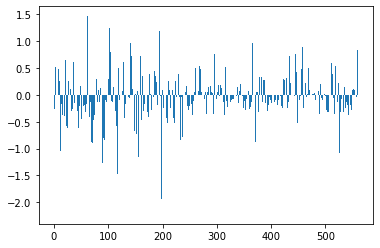

In [287]:
for i,v in enumerate(importance):
    #print('Feature: %0d, Score: %.5f' % (i,v))
    pass
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [387]:
y_pred_proba = logreg.predict_proba(X_test)

#fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba,multi_class='ovr')
auc>auc_best

False

In [388]:
print(auc)
print(auc_best)
auc_best = auc

0.9990963469139391
0.9990966057538521


In [381]:
print(np.abs(importance).min())
print(np.abs(importance).max())

2.8798063680849918e-05
5.017758754539019


In [382]:
col_to_remove = []
for i in range(importance.shape[1]):
    if (importance[:,i]<0.1).all():
        col_to_remove.append(i)
col_to_remove

[14, 80, 218, 366, 405, 406]

In [383]:
Xarr = np.delete(Xarr,col_to_remove,axis=1)

In [384]:
Xarr.shape

(7352, 464)

In [200]:
X_all.head()

,const,0,1,2,3,4,5,6,7,8,...,551,552,553,554,555,556,557,558,559,560
0,1.0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1.0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1.0,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1.0,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1.0,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [231]:
X_all = np.zeros((X.shape))
for i in range(len(y_arr)):
    X_all[i,:] = X.loc[i,:]

In [249]:
#X_all = sm.add_constant(X_all)
for i in range(25):
    X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_all,y_arr,test_size=0.25,random_state=0,stratify=y_arr)

    MNlogit = sm.MNLogit(y_train_sm, X_train_sm)

    # fit the model
    result1 = MNlogit.fit(method='bfgs',maxiter = 50,start_params=params)
    try:
        print(result1.summary())
    except:
        print(i, (result1.params-params).max())
    params = result1.params

         Current function value: 0.049907
         Iterations: 50
         Function evaluations: 54
         Gradient evaluations: 54


C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


0 2.9161711155288494
         Current function value: 0.053806
         Iterations: 50
         Function evaluations: 52
         Gradient evaluations: 52


C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


1 2.952677805833602
         Current function value: 0.059055
         Iterations: 50
         Function evaluations: 54
         Gradient evaluations: 54


C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


2 2.837380828838623
         Current function value: 0.060386
         Iterations: 50
         Function evaluations: 52
         Gradient evaluations: 52


C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


3 2.8349452347302906
         Current function value: 0.070934
         Iterations: 50
         Function evaluations: 52
         Gradient evaluations: 52


C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


4 2.673208488176091
         Current function value: 0.074274
         Iterations: 50
         Function evaluations: 52
         Gradient evaluations: 52


C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


5 2.592307019313263
         Current function value: 0.075916
         Iterations: 50
         Function evaluations: 55
         Gradient evaluations: 55


C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


6 2.346246331795267
         Current function value: 0.074142
         Iterations: 50
         Function evaluations: 53
         Gradient evaluations: 53


C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


7 2.1769377456534555
         Current function value: 0.091108
         Iterations: 50
         Function evaluations: 52
         Gradient evaluations: 52


C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


8 2.0393764304469677
         Current function value: 0.103781
         Iterations: 50
         Function evaluations: 53
         Gradient evaluations: 53


C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


9 2.060673534035393
         Current function value: 0.108925
         Iterations: 50
         Function evaluations: 54
         Gradient evaluations: 54


C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


10 2.071614248887941
         Current function value: 0.108550
         Iterations: 50
         Function evaluations: 54
         Gradient evaluations: 54


C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


11 1.6721481602591053
         Current function value: 0.104369
         Iterations: 50
         Function evaluations: 52
         Gradient evaluations: 52


C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


12 1.3850416538629535
         Current function value: 0.108188
         Iterations: 50
         Function evaluations: 54
         Gradient evaluations: 54


C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


13 1.256036923459027
         Current function value: 0.112613
         Iterations: 50
         Function evaluations: 53
         Gradient evaluations: 53


C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


14 1.239490896225266
         Current function value: 0.126614
         Iterations: 50
         Function evaluations: 53
         Gradient evaluations: 53


C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


15 1.1444973198228445
         Current function value: 0.133187
         Iterations: 50
         Function evaluations: 53
         Gradient evaluations: 53


C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


16 1.1639486634349554
         Current function value: 0.121861
         Iterations: 50
         Function evaluations: 54
         Gradient evaluations: 54


C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


17 1.4812576168256355
         Current function value: 0.152700
         Iterations: 50
         Function evaluations: 53
         Gradient evaluations: 53


C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


18 1.341971618940415
         Current function value: 0.164630
         Iterations: 50
         Function evaluations: 55
         Gradient evaluations: 55


C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


19 1.2619015752710223
         Current function value: 0.161018
         Iterations: 50
         Function evaluations: 55
         Gradient evaluations: 55


C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


20 2.2188759403043123
         Current function value: 0.202312
         Iterations: 50
         Function evaluations: 54
         Gradient evaluations: 54


C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


21 2.210119842696764
         Current function value: 0.201602
         Iterations: 50
         Function evaluations: 54
         Gradient evaluations: 54


C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


22 2.2768006858785688
         Current function value: 0.211049
         Iterations: 50
         Function evaluations: 54
         Gradient evaluations: 54


C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


23 2.2618580685755934
         Current function value: 0.216682
         Iterations: 50
         Function evaluations: 55
         Gradient evaluations: 55


C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


24 2.2862335950936012


In [245]:
params = result1.params

In [248]:
(result1.params-params).max()

2.9161711155288494

In [247]:
result1.params

array([[-0.76223375, -0.37289007,  0.13478471, -0.02136104,  0.23420396],
       [-0.34718989,  0.03293651, -1.48985132,  0.25911261, -0.72268329],
       [-0.31374992,  0.51255083, -0.46087247,  0.25912749, -0.86377982],
       ...,
       [ 0.9530532 , -0.71037582, -1.20730188, -0.99699043,  2.71854959],
       [ 0.19992113, -0.87702496, -1.57677609,  2.76475542, -0.39969794],
       [-0.2762102 , -0.05891102, -0.89530443,  0.57943733, -1.0060524 ]])

## Task 7 (Stretch)
Create your own function for Stepwise selection. Use either sklearn or statsmodel.